# Project 3
## Part 1: Regression analysis of Gapminder data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("gap.tsv", sep="\t")
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1

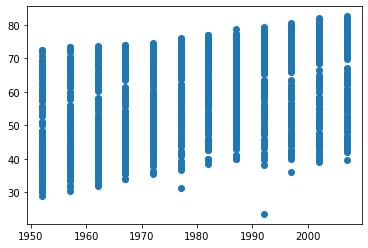

In [3]:
plt.scatter(data=data, x="year", y="lifeExp")

### Question 1
The plot shows a general trend of increasing life expectancy over time. It looks like a linear trend, however it is difficult to know for sure given that the change appears only slight over this time interval.

In [4]:
# gets list of lists -> life expectancy for each country for each year
life_exp_per_year = data.groupby("year")["lifeExp"].apply(list)
# gets list of the years of data collection
years = data.year.drop_duplicates()

Text(0.5, 1.0, 'Violin Plot of Life Expectancy Over Time')

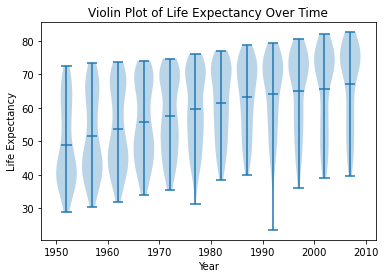

In [5]:
plt.violinplot(life_exp_per_year, years, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot of Life Expectancy Over Time")

### Question 2
The graph for individual years seems to be bimodal, with one mode above the mean and one below. In 1950-1960 it appears that most countries are below the mean life expectancy, and the graph is skewed toward the higher life expectancies. The skew decreases with time, however, and flips around 1970, where the two modes seem similar in size. By the 2000s the graph is skewed the other direction in an significant way.

### Question 3
I would reject the null hypothesisis of no relationship between life expectancy and time because mean life expectancy increases for every year measured in this dataset.

### Question 4
I think that a violin plot of the residuals from a linear regression model would look similar to the one I already plotted except the means would be around zero for each year, so it would be without the general upward trend. That's because the residuals are the values relative to the linear model at that year, which would be close to the mean lie expectancy for that year.

### Question 5 *NOT COMPLETE*
The mean life expectancy for countries over these years seems to have a linear trend with time, so a linear regression model that minimizes residuals should end up being around the mean for each year. It is because of this that I think "everything is okay," and the violin plot would end up looking like I described in question 4.

**** SUM OF SQUARES

### Exercise 2

In [9]:
# training data
X = data.year.values.reshape(-1, 1) # LinearRegression() requires a 2D array for samples
# target data
y = data.lifeExp

reg = LinearRegression().fit(X, y)

In [33]:
# prints the predicted values for every five years from 1950-2010
years_range = np.array(list(range(1950, 2011, 5)))
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range)
reg_df.columns = ["predictedLifeExp"]

reg_df

,predictedLifeExp
1950,49.860276
1955,51.489796
1960,53.119315
1965,54.748834
1970,56.378353
1975,58.007872
1980,59.637391
1985,61.266910
1990,62.896430
1995,64.525949


I decided to print the fitted model as a list of values (above) because I thought it would be an easy way to see the kind of predictions the model was making.

In [40]:
reg.intercept_

-585.6521874415448

In [41]:
reg.coef_

array([0.32590383])

The values above give the y-intercept and the slope, so the model in "y = mx + b" format would be:

$predicted\ life\ expectancy = (0.32590383 * year) - 585.6521874415448$

### Question 6
According to my linear regression model, life expectancy increases by about 0.326 years on average every year around the world. This can be seen from the value of `reg.coef_` in exercise 2.

### Question 7
I reject the null hypothesis of no relationship between year and life expectancy because the slope of the linear regression seems to be significantly greater than zero, which matches what I predicted the relationship was by just looking at the violin plot.